<a href="https://colab.research.google.com/github/dedemasutti/AI-projects/blob/master/Machine_Learning_aplicado_%C3%A0_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Carregando conjunto de dados de exemplo (por exemplo, Breast Cancer Wisconsin dataset)
dataset = datasets.load_breast_cancer()
X = dataset.data
y = dataset.target

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizandor os dados de treinamento e teste com StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define os hiperparâmetros a serem testados
#É possível utilizar uma busca em grade (grid search) para encontrar os melhores hiperparâmetros
parameters = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Realiza a busca em grade
grid_search = GridSearchCV(SVC(), parameters)
grid_search.fit(X_train, y_train)

# Pegamos os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

# Utilizamos o modelo com os melhores hiperparâmetros
model = grid_search.best_estimator_

#  validação cruzada
scores = cross_val_score(model, X_train, y_train, cv=5)

# Calcula a média das pontuações da validação cruzada
mean_accuracy = scores.mean()
print("Acurácia da validação cruzada:", mean_accuracy)

# Faz previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avalia a precisão do modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Melhores hiperparâmetros: {'C': 1, 'gamma': 0.1}
Acurácia da validação cruzada: 0.9626373626373625
Acurácia: 0.9649122807017544


## Gráficos


Acurácia da validação cruzada: 0.9626373626373625


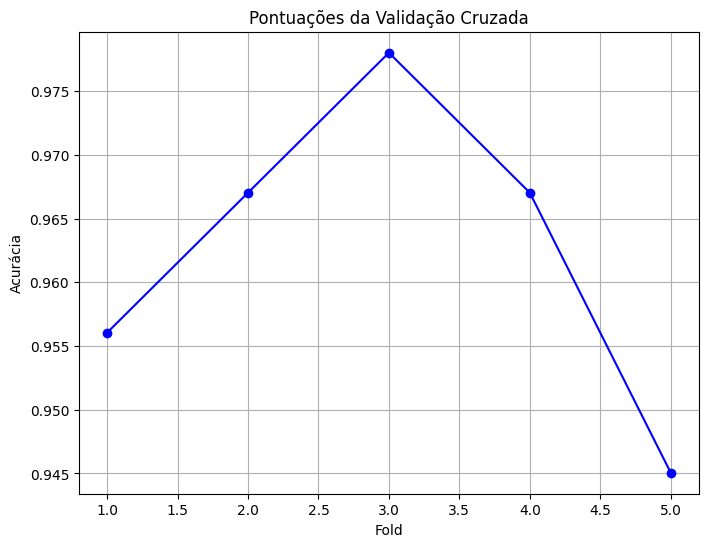

Acurácia: 0.9649122807017544


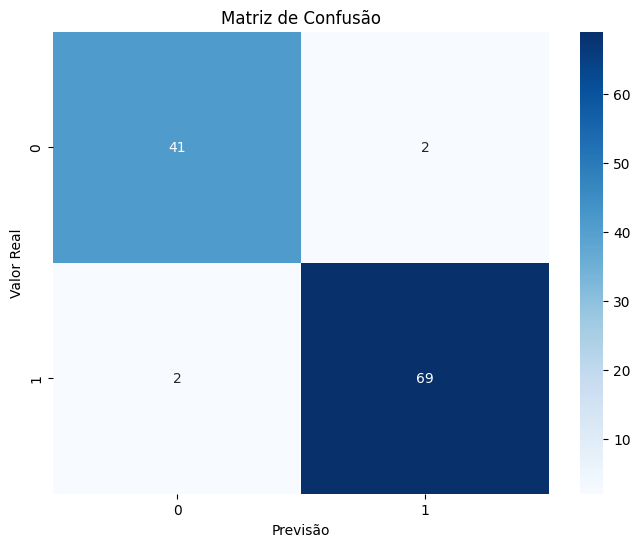

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ...

# Realizar validação cruzada
scores = cross_val_score(model, X_train, y_train, cv=5)

# Calcular a média das pontuações da validação cruzada
mean_accuracy = scores.mean()
print("Acurácia da validação cruzada:", mean_accuracy)

# Plotar pontuações da validação cruzada
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Acurácia')
plt.title('Pontuações da Validação Cruzada')
plt.grid(True)
plt.show()

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo no conjunto de teste
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsão')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()
